<a href="https://colab.research.google.com/github/victorsenoguchi/MAC0460_-_Introduction_to_Machine_Learning/blob/main/ep5_Deep_Learning_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras import models, layers, regularizers
from sklearn.model_selection import train_test_split
from time import time

In [ ]:
seed = 2021

# 2. MNIST Dataset

In [ ]:
 from tensorflow.keras.datasets import mnist

## 2.1. Data Preparation

In [ ]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

In [ ]:
num_classes = max(len(np.unique(y_train_ori)),
                  len(np.unique(y_test_ori)))

In [ ]:
X_train_ori = (X_train_ori/255.0).astype("float32")
y = y_train_ori
X_test_ori = (X_test_ori/255.0).astype("float32")
y_test = y_test_ori

## 2.2. MultiLayer Neural Network

In [ ]:
X = X_train_ori.reshape((60000,28*28))
X_test = X_test_ori.reshape((10000,28*28))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,  
                                                  y,
                                                  stratify = y,
                                                  train_size = 0.9, 
                                                  random_state = seed)

### 2.2.1. Defining and Training Model

In [ ]:
mnn = models.Sequential()
 
mnn.add(layers.Dense(256, 
                     activation = "relu", 
                     input_shape = (28*28,)))
 
mnn.add(layers.Dropout(0.5))
 
mnn.add(layers.Dense(256,
                     activation = "relu"))
 
mnn.add(layers.Dropout(0.5))
 
mnn.add(layers.Dense(num_classes, 
                     activation = "softmax"))
                    
mnn.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",   
            metrics = ['accuracy'])
 
ti = time()
mnn_mnist = mnn.fit(X_train,
                    y_train, 
                    validation_data = (X_val, y_val),
                    epochs = 16,
                    batch_size = 64,
                    verbose = 1)
tf = time()
mnn_tt = tf - ti

Epoch 1/16
844/844 [==============================] - 4s 4ms/step - loss: 0.4251 - accuracy: 0.8673 - val_loss: 0.1497 - val_accuracy: 0.9557
Epoch 2/16
844/844 [==============================] - 3s 3ms/step - loss: 0.2078 - accuracy: 0.9374 - val_loss: 0.1082 - val_accuracy: 0.9677
Epoch 3/16
844/844 [==============================] - 3s 3ms/step - loss: 0.1668 - accuracy: 0.9501 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 4/16
844/844 [==============================] - 3s 3ms/step - loss: 0.1458 - accuracy: 0.9564 - val_loss: 0.0883 - val_accuracy: 0.9738
Epoch 5/16
844/844 [==============================] - 3s 3ms/step - loss: 0.1339 - accuracy: 0.9594 - val_loss: 0.0879 - val_accuracy: 0.9738
Epoch 6/16
844/844 [==============================] - 3s 3ms/step - loss: 0.1216 - accuracy: 0.9627 - val_loss: 0.0824 - val_accuracy: 0.9775
Epoch 7/16
844/844 [==============================] - 3s 3ms/step - loss: 0.1160 - accuracy: 0.9649 - val_loss: 0.0833 - val_accuracy: 0.9762
Epoch 

### 2.2.2. Evaluation

##### Loss Curves

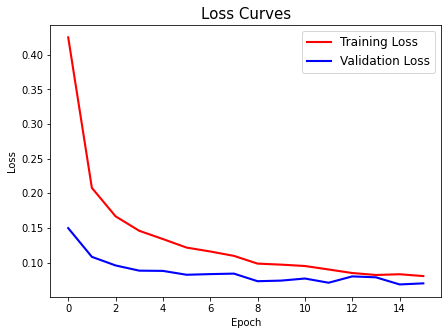

In [ ]:
plt.figure(figsize = [7, 5]) 
plt.plot(mnn_mnist.history["loss"], "r", linewidth = 2.1) 
plt.plot(mnn_mnist.history["val_loss"], "b", linewidth = 2.1) 
plt.legend(["Training Loss", "Validation Loss"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Loss", fontsize = 10) 
plt.title("Loss Curves", fontsize = 15)
plt.show()

##### Accuracy Curves

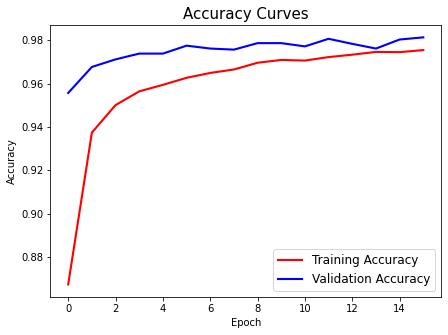

In [ ]:
plt.figure(figsize = [7, 5]) 
plt.plot(mnn_mnist.history["accuracy"], "r", linewidth = 2.1) 
plt.plot(mnn_mnist.history["val_accuracy"], "b", linewidth = 2.1) 
plt.legend(["Training Accuracy", "Validation Accuracy"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10) 
plt.title("Accuracy Curves", fontsize = 15)
plt.show()

##### Test Set Evaluation

In [ ]:
[mnn_loss, mnn_acc] = mnn.evaluate(X_test, y_test)
print("\nEvaluation result on Test Set :\n\n Loss = {0:.3f}\n Accuracy = {1:.3f}".format(mnn_loss, mnn_acc))
 
print(" Training Time: {0:.3f}s".format(mnn_tt))

313/313 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9802

Evaluation result on Test Set :

 Loss = 0.070
 Accuracy = 0.980
 Training Time: 82.472s


## 2.3. Convolutional Neural Network

In [ ]:
X = X_train_ori.reshape((60000, 28, 28, 1))
X_test = X_test_ori.reshape((10000, 28, 28, 1))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,  
                                                  y, 
                                                  stratify = y,
                                                  train_size = 0.9, 
                                                  random_state = seed)

### 2.3.1. Defining and Training Model

In [ ]:
cnn = models.Sequential()
 
cnn.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
 
 
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.5))
 
cnn.add(layers.Dense(64, activation = "relu"))
 
cnn.add(layers.Dense(10, activation = "softmax"))
 
cnn.compile(optimizer = 'adam',
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])
 
ti = time()
cnn_mnist = cnn.fit(X_train,  
                    y_train, 
                    validation_data = (X_val, y_val),
                    batch_size = 64,
                    epochs = 16)
tf = time()
cnn_tt = tf - ti

Epoch 1/16
844/844 [==============================] - 31s 6ms/step - loss: 0.2620 - accuracy: 0.9209 - val_loss: 0.0983 - val_accuracy: 0.9695
Epoch 2/16
844/844 [==============================] - 5s 5ms/step - loss: 0.1077 - accuracy: 0.9673 - val_loss: 0.0694 - val_accuracy: 0.9798
Epoch 3/16
844/844 [==============================] - 5s 5ms/step - loss: 0.0814 - accuracy: 0.9743 - val_loss: 0.0528 - val_accuracy: 0.9843
Epoch 4/16
844/844 [==============================] - 5s 6ms/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.0461 - val_accuracy: 0.9852
Epoch 5/16
844/844 [==============================] - 5s 5ms/step - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0445 - val_accuracy: 0.9845
Epoch 6/16
844/844 [==============================] - 5s 5ms/step - loss: 0.0480 - accuracy: 0.9843 - val_loss: 0.0412 - val_accuracy: 0.9867
Epoch 7/16
844/844 [==============================] - 5s 5ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 0.0360 - val_accuracy: 0.9875
Epoch

### 2.3.2. Evaluation

##### Loss Curves

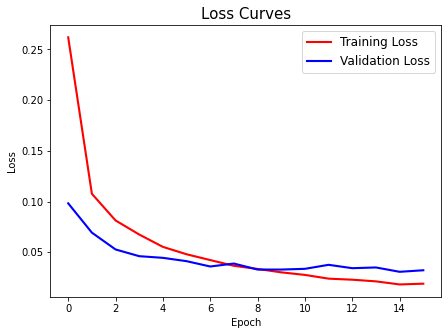

In [ ]:
plt.figure(figsize = [7, 5]) 
plt.plot(cnn_mnist.history["loss"], "r", linewidth = 2.1) 
plt.plot(cnn_mnist.history["val_loss"], "b", linewidth = 2.1) 
plt.legend(["Training Loss", "Validation Loss"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Loss", fontsize = 10) 
plt.title("Loss Curves", fontsize = 15)
plt.show()

##### Accuracy Curves

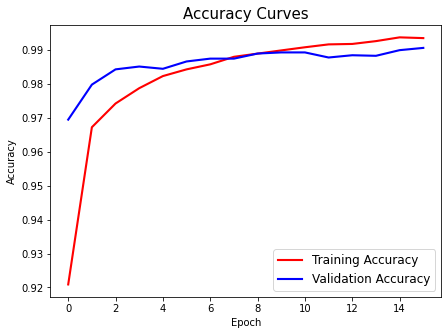

In [ ]:
plt.figure(figsize = [7, 5]) 
plt.plot(cnn_mnist.history["accuracy"], "r", linewidth = 2.1) 
plt.plot(cnn_mnist.history["val_accuracy"], "b", linewidth = 2.1) 
plt.legend(["Training Accuracy", "Validation Accuracy"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10) 
plt.title("Accuracy Curves", fontsize = 15)
plt.show()

##### Test Set Evaluation

In [ ]:
[cnn_loss, cnn_acc] = cnn.evaluate(X_test, y_test)
print("\nEvaluation result on Test Set:\n\n Loss = {0:.3f}\n Accuracy = {1:.3f}".format(cnn_loss, cnn_acc))

print(" Training Time: {0:.3f}s".format(cnn_tt))

313/313 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9891

Evaluation result on Test Set :

 Loss = 0.036
 Accuracy = 0.989
 Training Time: {0:.3f}s 142.38260173797607


## 2.4. Model Comparison

In [ ]:
if cnn_acc > mnn_acc:
  print("The convolutial neural network has the best test accuracy")
  print("Test accuracy = {0:.3f}".format(cnn_acc))
  print("The convolutial neural network test accuracy is {0:.3f}% better than the multilayer neural network".format(100*(cnn_acc-mnn_acc)/mnn_acc))
else:
  print("The multilayer neural network has the best test accuracy")
  print("Test Accuracy = {0:.3f}".format(mnn_acc))
  print("The multilayer neural network test accuracy is {0:.3f}% better than the convolutial neural network".format(100*(mnn_acc-cnn_acc)/cnn_acc))
 
print()
 
if cnn_tt < mnn_tt:
  print("The convolutial neural network has the best training time")
  print("Training time = {0:.3f}s".format(cnn_tt))
  print("The convolutial neural network training time is {0:.3f}% faster than the multilayer neural network".format(100*(mnn_tt-cnn_tt)/cnn_tt))
else:
  print("The multilayer neural network has the best training time")
  print("Training time = {0:.3f}s".format(mnn_tt))
  print("The multilayer neural network training time is {0:.3f}% faster than the convolutial neural network".format(100*(cnn_tt-mnn_tt)/mnn_tt))

The convolutial neural network has the best test accuracy
Test accuracy = 0.989
The convolutial neural network test accuracy is 0.908% better than the multilayer neural network

The multilayer neural network has the best test accuracy
Training time = 82.472s
The multilayer neural network training time is 72.643% faster than the convolutial neural network


# 3. Fashion MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

## 3.1. Data Preparation

In [ ]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = fashion_mnist.load_data()

In [ ]:
num_classes = max(len(np.unique(y_train_ori)),
                  len(np.unique(y_test_ori)))

In [ ]:
X_train_ori = (X_train_ori/255.0).astype("float32")
y = y_train_ori
X_test_ori = (X_test_ori/255.0).astype("float32")
y_test = y_test_ori

## 3.2. MultiLayer Neural Network

In [ ]:
X = X_train_ori.reshape((60000,28*28))
X_test = X_test_ori.reshape((10000,28*28))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,  
                                                  y,
                                                  stratify = y,
                                                  train_size = 0.9, 
                                                  random_state = seed)

### 3.2.1. Defining and Training Model

In [ ]:
mnn = models.Sequential()
 
mnn.add(layers.Dense(256, 
                     activation = "relu", 
                     input_shape = (28*28,)))
 
mnn.add(layers.Dropout(0.25))
 
mnn.add(layers.Dense(512,
                     activation = "relu"))
 
mnn.add(layers.Dropout(0.25))
 
mnn.add(layers.Dense(512,
                     activation = "relu"))
 
mnn.add(layers.Dropout(0.25))
 
mnn.add(layers.Dense(num_classes, 
                     activation = "softmax"))
                    
mnn.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",   
            metrics = ['accuracy'])
 
ti = time()
mnn_mnist = mnn.fit(X_train,
                    y_train, 
                    validation_data = (X_val, y_val),
                    epochs = 16,
                    batch_size = 64,
                    verbose = 1)
tf = time()
mnn_tt = tf - ti

Epoch 1/16
844/844 [==============================] - 4s 4ms/step - loss: 0.5573 - accuracy: 0.7971 - val_loss: 0.4397 - val_accuracy: 0.8250
Epoch 2/16
844/844 [==============================] - 4s 4ms/step - loss: 0.4244 - accuracy: 0.8458 - val_loss: 0.3559 - val_accuracy: 0.8700
Epoch 3/16
844/844 [==============================] - 3s 4ms/step - loss: 0.3915 - accuracy: 0.8587 - val_loss: 0.3501 - val_accuracy: 0.8710
Epoch 4/16
844/844 [==============================] - 3s 4ms/step - loss: 0.3718 - accuracy: 0.8630 - val_loss: 0.3376 - val_accuracy: 0.8822
Epoch 5/16
844/844 [==============================] - 3s 4ms/step - loss: 0.3570 - accuracy: 0.8704 - val_loss: 0.3217 - val_accuracy: 0.8833
Epoch 6/16
844/844 [==============================] - 3s 4ms/step - loss: 0.3417 - accuracy: 0.8735 - val_loss: 0.3299 - val_accuracy: 0.8755
Epoch 7/16
844/844 [==============================] - 3s 4ms/step - loss: 0.3339 - accuracy: 0.8773 - val_loss: 0.3084 - val_accuracy: 0.8845
Epoch 

### 3.2.2. Evaluation

##### Loss Curves

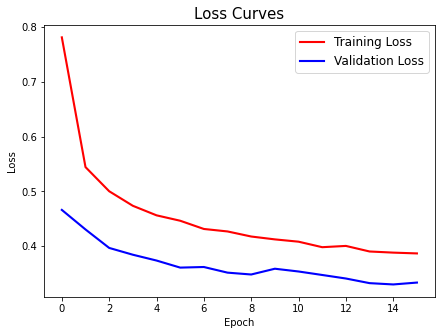

In [ ]:
plt.figure(figsize = [7, 5]) 
plt.plot(mnn_mnist.history["loss"], "r", linewidth = 2.1) 
plt.plot(mnn_mnist.history["val_loss"], "b", linewidth = 2.1) 
plt.legend(["Training Loss", "Validation Loss"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Loss", fontsize = 10) 
plt.title("Loss Curves", fontsize = 15)
plt.show()

##### Accuracy Curves

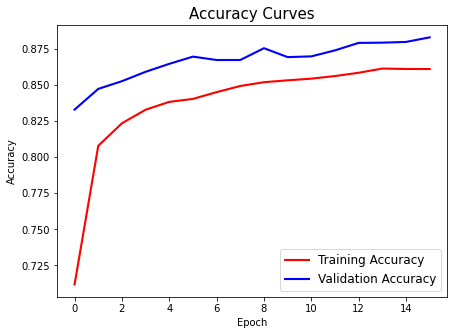

In [ ]:
plt.figure(figsize = [7, 5]) 
plt.plot(mnn_mnist.history["accuracy"], "r", linewidth = 2.1) 
plt.plot(mnn_mnist.history["val_accuracy"], "b", linewidth = 2.1) 
plt.legend(["Training Accuracy", "Validation Accuracy"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10) 
plt.title("Accuracy Curves", fontsize = 15)
plt.show()

##### Test Set Evaluation

In [ ]:
[mnn_loss, mnn_acc] = mnn.evaluate(X_test, y_test)
print("\nEvaluation result on Test Set :\n\n Loss = {0:.3f}\n Accuracy = {1:.3f}".format(mnn_loss, mnn_acc))

print(" Training Time: {0:.3f}s".format(mnn_tt))

313/313 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8700

Evaluation result on Test Set :

 Loss = 0.362
 Accuracy = 0.870
 Training Time: {0:.3f}s 51.86091470718384


## 3.3. Convolutional Neural Network

In [ ]:
X = X_train_ori.reshape((60000, 28, 28, 1))
X_test = X_test_ori.reshape((10000, 28, 28, 1))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,  
                                                  y, 
                                                  stratify = y,
                                                  train_size = 0.7, 
                                                  random_state = seed)

### 3.2.1. Defining and Training Model

In [ ]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
 
 
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.5))
 
cnn.add(layers.Dense(64, activation = "relu"))

cnn.add(layers.Dense(10, activation = "softmax"))
 
cnn.compile(optimizer = 'adam',
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])
 
ti = time()
cnn_mnist = cnn.fit(X_train,  
                    y_train, 
                    validation_data = (X_val, y_val),
                    batch_size = 64,
                    epochs = 16)
tf = time()
cnn_tt = tf - ti

Epoch 1/16
657/657 [==============================] - 5s 7ms/step - loss: 0.5080 - accuracy: 0.8198 - val_loss: 0.3728 - val_accuracy: 0.8703
Epoch 2/16
657/657 [==============================] - 4s 6ms/step - loss: 0.3593 - accuracy: 0.8713 - val_loss: 0.3412 - val_accuracy: 0.8778
Epoch 3/16
657/657 [==============================] - 4s 6ms/step - loss: 0.3193 - accuracy: 0.8840 - val_loss: 0.3115 - val_accuracy: 0.8922
Epoch 4/16
657/657 [==============================] - 5s 7ms/step - loss: 0.2935 - accuracy: 0.8946 - val_loss: 0.2894 - val_accuracy: 0.8972
Epoch 5/16
657/657 [==============================] - 4s 6ms/step - loss: 0.2698 - accuracy: 0.9015 - val_loss: 0.2751 - val_accuracy: 0.9010
Epoch 6/16
657/657 [==============================] - 5s 7ms/step - loss: 0.2556 - accuracy: 0.9063 - val_loss: 0.2704 - val_accuracy: 0.9028
Epoch 7/16
657/657 [==============================] - 5s 7ms/step - loss: 0.2375 - accuracy: 0.9109 - val_loss: 0.2633 - val_accuracy: 0.9071
Epoch 

### 3.2.2 Evaluation

##### Loss Curves

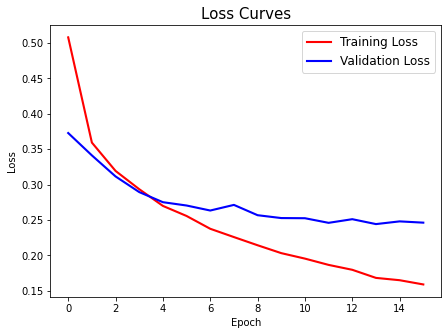

In [ ]:
plt.figure(figsize = [7, 5]) 
plt.plot(cnn_mnist.history["loss"], "r", linewidth = 2.1) 
plt.plot(cnn_mnist.history["val_loss"], "b", linewidth = 2.1) 
plt.legend(["Training Loss", "Validation Loss"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Loss", fontsize = 10) 
plt.title("Loss Curves", fontsize = 15)
plt.show()

##### Accuracy Curves

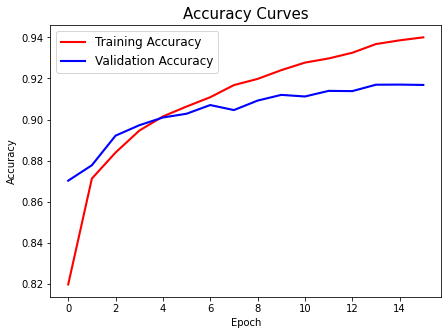

In [ ]:
plt.figure(figsize = [7, 5]) 
plt.plot(cnn_mnist.history["accuracy"], "r", linewidth = 2.1) 
plt.plot(cnn_mnist.history["val_accuracy"], "b", linewidth = 2.1) 
plt.legend(["Training Accuracy", "Validation Accuracy"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10) 
plt.title("Accuracy Curves", fontsize = 15)
plt.show()

##### Test Set Evaluation

In [ ]:
[cnn_loss, cnn_acc] = cnn.evaluate(X_test, y_test)
print("\nEvaluation result on Test Set :\n\n Loss = {0:.3f}\n Accuracy = {1:.3f}".format(cnn_loss, cnn_acc))
 
print(" Training Time: {0:.3f}s".format(cnn_tt))

313/313 [==============================] - 1s 3ms/step - loss: 0.2593 - accuracy: 0.9112

Evaluation result on Test Set :

 Loss = 0.259
 Accuracy = 0.911
 Training Time: 71.960s


## 3.4. Model Comparison

In [ ]:
if cnn_acc > mnn_acc:
  print("The convolutial neural network has the best test accuracy")
  print("Test accuracy = {0:.3f}".format(cnn_acc))
  print("The convolutial neural network test accuracy is {0:.3f}% better than the multilayer neural network".format(100*(cnn_acc-mnn_acc)/mnn_acc))
else:
  print("The multilayer neural network has the best test accuracy")
  print("Test Accuracy = {0:.3f}".format(mnn_acc))
  print("The multilayer neural network test accuracy is {0:.3f}% better than the convolutial neural network".format(100*(mnn_acc-cnn_acc)/cnn_acc))

print()

if cnn_tt < mnn_tt:
  print("The convolutial neural network has the best training time")
  print("Training time = {0:.3f}s".format(cnn_tt))
  print("The convolutial neural network training time is {0:.3f}% faster than the multilayer neural network".format(100*(mnn_tt-cnn_tt)/cnn_tt))
else:
  print("The multilayer neural network has the best training time")
  print("Training time = {0:.3f}s".format(mnn_tt))
  print("The multilayer neural network training time is {0:.3f}% faster than the convolutial neural network".format(100*(cnn_tt-mnn_tt)/mnn_tt))

The convolutial neural network has the best test accuracy
Test accuracy = 0.911
The convolutial neural network test accuracy is 4.736% better than the multilayer neural network

The multilayer neural network has the best test accuracy
Training time = 51.861s
The multilayer neural network training time is 38.756% faster than the convolutial neural network


# 5. Conclusion

We can notice that for both datasets the convolutional networks have a little better accuracy than the multilayer network, however their training time is much longer.
